# Análise exploratória dos dados de exportação do RN

## Fonte dos dados
> ![](https://lh4.googleusercontent.com/proxy/fXgKw9x3Ea2Yv-B5CtmnQnFjuRco5o10y3lZahcsz3jBaEmnVUyPKj1EcigqdJAjHz0ZVnITm2Bll7No15Ylxp3ng2EW08BKudKAkJoG)


# Caregando datasets diretamente das planilhas

In [1]:
import pandas as pd

# Carrega excel em um dataframe
dataset_exportacoes_rn_continente = pd.read_excel('../data/V_EXPORTACAO_GERAL_1997-01_2024-12_CONTINENTE_EXCEL.xlsx')
dataset_exportacoes_rn_blocos_economicos = pd.read_excel('../data/V_EXPORTACAO_GERAL_1997-01_2024-12_BLOCOS_ECONOMICOS_EXCEL.xlsx')

## Limpar dados do Dataset
>1. Removendo a coluna **UF do Produto** pois todos os produtos estão relacionados ao RN
2. Removendo as colunas **Código NCM** e **Descrição NCM** porque optamos ficar com o sistema de descrição SH para codificar e descrever os produtos.
3. Removendo as colunas **Código Seção** e **Descrição Seção** porque já é possível agrupar os produtos usndo o Código SH.

In [2]:
dataset_exportacoes_rn_blocos_economicos = dataset_exportacoes_rn_blocos_economicos.drop(columns=['UF do Produto', 'Código NCM', 'Descrição NCM', 'Código Seção', 'Descrição Seção'])
dataset_exportacoes_rn_continente = dataset_exportacoes_rn_continente.drop(columns=['UF do Produto', 'Código NCM', 'Descrição NCM', 'Código Seção', 'Descrição Seção'])

In [3]:
len(dataset_exportacoes_rn_blocos_economicos)

31889

# Transformando coluna mês em numérico

In [4]:
dataset_exportacoes_rn_blocos_economicos['Mês'] = dataset_exportacoes_rn_blocos_economicos['Mês'].str.extract(r'(\d+)').astype(int)
dataset_exportacoes_rn_continente['Mês'] = dataset_exportacoes_rn_continente['Mês'].str.extract(r'(\d+)').astype(int)

In [5]:
dataset_exportacoes_rn_continente.count()

Ano                       57135
Mês                       57135
Bloco Econômico           57135
Países                    57135
Via                       57135
URF                       57135
Código SH6                57135
Descrição SH6             57135
Código SH4                57135
Descrição SH4             57135
Código SH2                57135
Descrição SH2             57135
Unidade estatística       57135
Valor US$ FOB             57135
Quilograma Líquido        57135
Quantidade Estatística    57135
dtype: int64

# Adicionando nova coluna Mês/Ano

In [6]:
# Renomeando temporariamente as colunas
dataset_exportacoes_rn_blocos_economicos = dataset_exportacoes_rn_blocos_economicos.rename(columns={'Ano': 'year', 'Mês': 'month'})
dataset_exportacoes_rn_continente = dataset_exportacoes_rn_continente.rename(columns={'Ano': 'year', 'Mês': 'month'})

# Criando a coluna 'Mês/Ano' como datetime
dataset_exportacoes_rn_blocos_economicos['Data'] = pd.to_datetime(dataset_exportacoes_rn_blocos_economicos[['year', 'month']].assign(day=1))
dataset_exportacoes_rn_continente['Data'] = pd.to_datetime(dataset_exportacoes_rn_continente[['year', 'month']].assign(day=1))

dataset_exportacoes_rn_blocos_economicos = dataset_exportacoes_rn_blocos_economicos.rename(columns={'year': 'Ano', 'month': 'Mês'})
dataset_exportacoes_rn_continente = dataset_exportacoes_rn_continente.rename(columns={'year': 'Ano', 'month': 'Mês'})

# Dropa colunas Mês e Ano
# Blocos economicos
dataset_exportacoes_rn_blocos_economicos = dataset_exportacoes_rn_blocos_economicos.drop("Ano", axis = 1)
dataset_exportacoes_rn_blocos_economicos = dataset_exportacoes_rn_blocos_economicos.drop("Mês", axis = 1)

# Continentes
dataset_exportacoes_rn_continente = dataset_exportacoes_rn_continente.drop("Ano", axis = 1)
dataset_exportacoes_rn_continente = dataset_exportacoes_rn_continente.drop("Mês", axis = 1)

# Adicionando nova coluna Valor US$ FOB por Quilograma Líquido

In [7]:
# Supondo que o seu DataFrame seja chamado 'df'
dataset_exportacoes_rn_blocos_economicos['Valor FOB por Quilograma'] = dataset_exportacoes_rn_blocos_economicos['Valor US$ FOB'] / dataset_exportacoes_rn_blocos_economicos['Quilograma Líquido']
dataset_exportacoes_rn_continente['Valor FOB por Quilograma'] = dataset_exportacoes_rn_continente['Valor US$ FOB'] / dataset_exportacoes_rn_continente['Quilograma Líquido']
dataset_exportacoes_rn_continente

,Bloco Econômico,Países,Via,URF,Código SH6,Descrição SH6,Código SH4,Descrição SH4,Código SH2,Descrição SH2,Unidade estatística,Valor US$ FOB,Quilograma Líquido,Quantidade Estatística,Data,Valor FOB por Quilograma
0,América Central e Caribe,Bahamas,MARITIMA,0420154 - IRF NATAL,271019,Outros óleos de petróleo ou de minerais betumi...,2710,"Óleos de petróleo ou de minerais betuminosos, ...",27,"Combustíveis minerais, óleos minerais e produt...",METRO CUBICO,14906,11675,15,2024-09-01,1.276745
1,América Central e Caribe,Costa Rica,MARITIMA,0817800 - PORTO DE SANTOS,520939,"Outros tecidos de algodão tinto, contendo => 8...",5209,"Tecidos de algodão, contendo pelo menos 85 %, ...",52,Algodão,QUILOGRAMA LIQUIDO,11130,1294,1294,2024-09-01,8.601236
2,América Central e Caribe,Costa Rica,MARITIMA,0917800 - PORTO DE PARANAGUA,170490,"Outros produtos de confeitaria, sem cacau",1704,Produtos de confeitaria sem cacau (incluído o ...,17,Açúcares e produtos de confeitaria,QUILOGRAMA LIQUIDO,38824,22782,22782,2024-09-01,1.704152
3,América Central e Caribe,El Salvador,MARITIMA,0420154 - IRF NATAL,271019,Outros óleos de petróleo ou de minerais betumi...,2710,"Óleos de petróleo ou de minerais betuminosos, ...",27,"Combustíveis minerais, óleos minerais e produt...",METRO CUBICO,1915,1482,2,2024-09-01,1.292173
4,América Central e Caribe,El Salvador,MARITIMA,0517800 - ALF - SALVADOR,520922,"Tecido de algodão branqueado, em ponto sarjado...",5209,"Tecidos de algodão, contendo pelo menos 85 %, ...",52,Algodão,QUILOGRAMA LIQUIDO,58126,9825,9825,2024-09-01,5.916132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57130,África,África do Sul,MARITIMA,0517600 - PORTO DE SALVADOR,170410,"Gomas de mascar, sem cacau, mesmo revestidas d...",1704,Produtos de confeitaria sem cacau (incluído o ...,17,Açúcares e produtos de confeitaria,QUILOGRAMA LIQUIDO,9696,4640,0,1997-01-01,2.089655
57131,África,África do Sul,MARITIMA,0517600 - PORTO DE SALVADOR,170490,"Outros produtos de confeitaria, sem cacau",1704,Produtos de confeitaria sem cacau (incluído o ...,17,Açúcares e produtos de confeitaria,QUILOGRAMA LIQUIDO,40640,30275,0,1997-01-01,1.342362
57132,África,África do Sul,MARITIMA,0517600 - PORTO DE SALVADOR,170490,"Outros produtos de confeitaria, sem cacau",1704,Produtos de confeitaria sem cacau (incluído o ...,17,Açúcares e produtos de confeitaria,QUILOGRAMA LIQUIDO,34060,26720,0,1997-01-01,1.274701
57133,Ásia (Exclusive Oriente Médio),Indonésia,MARITIMA,0317600 - PORTO DE FORTALEZA,152110,"Ceras vegetais, mesmo refinadas ou coradas (ex...",1521,"Ceras vegetais (exceto triglicéridos), ceras d...",15,Gorduras e óleos animais ou vegetais; produtos...,QUILOGRAMA LIQUIDO,45276,14000,14,1997-01-01,3.234000


#Substituir 0 na coluna 'Quantidade Estatística' pelo valor correspondente em 'Quilograma Líquido'

In [8]:
# Substituir 0 na coluna 'Quantidade Estatística' pelo valor correspondente em 'Quilograma Líquido'
dataset_exportacoes_rn_continente['Quantidade Estatística'] = dataset_exportacoes_rn_continente.apply(
    lambda row: row['Quilograma Líquido'] if row['Quantidade Estatística'] == 0 else row['Quantidade Estatística'],
    axis=1
)

# Adicionando nova coluna Valor US$ FOB por Quantidade estatistica

In [9]:
# Supondo que o seu DataFrame seja chamado 'df'
dataset_exportacoes_rn_blocos_economicos['Valor FOB por Quantidade Estatística'] = dataset_exportacoes_rn_blocos_economicos['Valor US$ FOB'] / dataset_exportacoes_rn_blocos_economicos['Quantidade Estatística']
dataset_exportacoes_rn_continente['Valor FOB por Quantidade Estatística'] = dataset_exportacoes_rn_continente['Valor US$ FOB'] / dataset_exportacoes_rn_continente['Quantidade Estatística']

# Visualizando dataset após tranformações

In [10]:
dataset_exportacoes_rn_blocos_economicos.head()

,Bloco Econômico,Países,Via,URF,Código SH6,Descrição SH6,Código SH4,Descrição SH4,Código SH2,Descrição SH2,Unidade estatística,Valor US$ FOB,Quilograma Líquido,Quantidade Estatística,Data,Valor FOB por Quilograma,Valor FOB por Quantidade Estatística
0,Associação de Nações do Sudeste Asiático - ASEAN,Malásia,MARITIMA,0817800 - PORTO DE SANTOS,391590,"Desperdícios, resíduos e aparas, de outros plá...",3915,"Desperdícios, resíduos e aparas, de plástico",39,Plásticos e suas obras,QUILOGRAMA LIQUIDO,29295,21000,21000,2024-09-01,1.395000,1.395000
1,Associação de Nações do Sudeste Asiático - ASEAN,Vietnã,AEREA,0420154 - IRF NATAL,121190,"Outras plantas, partes de plantas, sementes e ...",1211,"Plantas, partes de plantas, sementes e frutos,...",12,"Sementes e frutos oleaginosos; grãos, sementes...",QUILOGRAMA LIQUIDO,52000,1300,1300,2024-09-01,40.000000,40.000000
2,Comunidade Andina das Nações - CAN,Colômbia,AEREA,0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO...,392690,Outras obras de plásticos e obras de outras ma...,3926,Outras obras de plástico e obras de outras mat...,39,Plásticos e suas obras,QUILOGRAMA LIQUIDO,1924,125,125,2024-09-01,15.392000,15.392000
3,Comunidade Andina das Nações - CAN,Colômbia,AEREA,0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO...,520922,"Tecido de algodão branqueado, em ponto sarjado...",5209,"Tecidos de algodão, contendo pelo menos 85 %, ...",52,Algodão,QUILOGRAMA LIQUIDO,5274,624,624,2024-09-01,8.451923,8.451923
4,Comunidade Andina das Nações - CAN,Colômbia,AEREA,0817600 - AEROPORTO INTERNACIONAL DE SAO PAULO...,630790,Outros artefatos têxteis confeccionados,6307,"Outros artefactos confeccionados, incluídos os...",63,Outros artefatos têxteis confeccionados; sorti...,QUILOGRAMA LIQUIDO,411,25,25,2024-09-01,16.440000,16.440000


In [11]:
dataset_exportacoes_rn_continente.head()

,Bloco Econômico,Países,Via,URF,Código SH6,Descrição SH6,Código SH4,Descrição SH4,Código SH2,Descrição SH2,Unidade estatística,Valor US$ FOB,Quilograma Líquido,Quantidade Estatística,Data,Valor FOB por Quilograma,Valor FOB por Quantidade Estatística
0,América Central e Caribe,Bahamas,MARITIMA,0420154 - IRF NATAL,271019,Outros óleos de petróleo ou de minerais betumi...,2710,"Óleos de petróleo ou de minerais betuminosos, ...",27,"Combustíveis minerais, óleos minerais e produt...",METRO CUBICO,14906,11675,15,2024-09-01,1.276745,993.733333
1,América Central e Caribe,Costa Rica,MARITIMA,0817800 - PORTO DE SANTOS,520939,"Outros tecidos de algodão tinto, contendo => 8...",5209,"Tecidos de algodão, contendo pelo menos 85 %, ...",52,Algodão,QUILOGRAMA LIQUIDO,11130,1294,1294,2024-09-01,8.601236,8.601236
2,América Central e Caribe,Costa Rica,MARITIMA,0917800 - PORTO DE PARANAGUA,170490,"Outros produtos de confeitaria, sem cacau",1704,Produtos de confeitaria sem cacau (incluído o ...,17,Açúcares e produtos de confeitaria,QUILOGRAMA LIQUIDO,38824,22782,22782,2024-09-01,1.704152,1.704152
3,América Central e Caribe,El Salvador,MARITIMA,0420154 - IRF NATAL,271019,Outros óleos de petróleo ou de minerais betumi...,2710,"Óleos de petróleo ou de minerais betuminosos, ...",27,"Combustíveis minerais, óleos minerais e produt...",METRO CUBICO,1915,1482,2,2024-09-01,1.292173,957.500000
4,América Central e Caribe,El Salvador,MARITIMA,0517800 - ALF - SALVADOR,520922,"Tecido de algodão branqueado, em ponto sarjado...",5209,"Tecidos de algodão, contendo pelo menos 85 %, ...",52,Algodão,QUILOGRAMA LIQUIDO,58126,9825,9825,2024-09-01,5.916132,5.916132


# Estatisticas descritivas iniciais das bases de dados

In [12]:
dataset_exportacoes_rn_blocos_economicos.describe()

C:\Users\joao1\Documents\Workspace\Mestrado\RAG\run_llm_locally\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\joao1\Documents\Workspace\Mestrado\RAG\run_llm_locally\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\joao1\Documents\Workspace\Mestrado\RAG\run_llm_locally\.venv\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,Código SH6,Código SH4,Código SH2,Valor US$ FOB,Quilograma Líquido,Quantidade Estatística,Data,Valor FOB por Quilograma,Valor FOB por Quantidade Estatística
count,31889.000000,31889.000000,31889.000000,3.188900e+04,3.188900e+04,3.188900e+04,31889,3.188200e+04,3.187400e+04
mean,285978.747687,2859.466713,28.512622,1.352886e+05,2.055934e+05,7.776450e+04,2012-09-14 23:04:51.824767232,inf,inf
min,10190.000000,101.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1997-01-01 00:00:00,0.000000e+00,0.000000e+00
25%,80711.000000,807.000000,8.000000,3.727000e+03,1.200000e+03,0.000000e+00,2006-07-01 00:00:00,7.022507e-01,1.254104e+00
50%,152110.000000,1521.000000,15.000000,1.849400e+04,1.130500e+04,1.363000e+03,2013-11-01 00:00:00,2.386536e+00,6.734556e+00
75%,520932.000000,5209.000000,52.000000,6.778900e+04,4.334000e+04,1.734900e+04,2019-03-01 00:00:00,6.528760e+00,NaN
max,999802.000000,9998.000000,99.000000,1.154291e+08,2.021515e+08,3.383300e+07,2024-09-01 00:00:00,inf,inf
std,255214.860098,2552.131605,25.486074,1.351684e+06,2.315952e+06,5.194471e+05,NaN,NaN,NaN


In [13]:
dataset_exportacoes_rn_continente.describe()

C:\Users\joao1\Documents\Workspace\Mestrado\RAG\run_llm_locally\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\joao1\Documents\Workspace\Mestrado\RAG\run_llm_locally\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Código SH6,Código SH4,Código SH2,Valor US$ FOB,Quilograma Líquido,Quantidade Estatística,Data,Valor FOB por Quilograma,Valor FOB por Quantidade Estatística
count,57135.000000,57135.000000,57135.000000,5.713500e+04,5.713500e+04,5.713500e+04,57135,5.712100e+04,5.712300e+04
mean,275182.027251,2751.457723,27.439415,1.633967e+05,5.897617e+05,4.475427e+05,2012-10-17 06:59:20.115515648,inf,inf
min,10190.000000,101.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1997-01-01 00:00:00,0.000000e+00,0.000000e+00
25%,80450.000000,804.000000,8.000000,5.100000e+03,1.493500e+03,9.170000e+02,2006-07-01 00:00:00,8.579487e-01,1.048694e+00
50%,170410.000000,1704.000000,17.000000,2.364500e+04,1.294400e+04,9.039000e+03,2014-01-01 00:00:00,2.879786e+00,4.004180e+00
75%,520929.000000,5209.000000,52.000000,8.637450e+04,4.454300e+04,3.317750e+04,2019-04-01 00:00:00,6.951688e+00,7.976483e+00
max,999802.000000,9998.000000,99.000000,1.154291e+08,6.116450e+08,6.341000e+08,2024-09-01 00:00:00,inf,inf
std,250604.279740,2506.041211,25.028828,1.271327e+06,6.669498e+06,6.143353e+06,NaN,NaN,NaN


Conferindo os tipos de dados do dataset

In [14]:
#Conferindo os tipos de dados do dataset
print("------------------------------------------------")
print("Tipos presentes no dataset por blocos econômicos")
print("------------------------------------------------")
print(dataset_exportacoes_rn_blocos_economicos.dtypes)
print("------------------------------------------------")
print("Tipos presentes no dataset por continente")
print("------------------------------------------------")
print(dataset_exportacoes_rn_continente.dtypes)

------------------------------------------------
Tipos presentes no dataset por blocos econômicos
------------------------------------------------
Bloco Econômico                                 object
Países                                          object
Via                                             object
URF                                             object
Código SH6                                       int64
Descrição SH6                                   object
Código SH4                                       int64
Descrição SH4                                   object
Código SH2                                       int64
Descrição SH2                                   object
Unidade estatística                             object
Valor US$ FOB                                    int64
Quilograma Líquido                               int64
Quantidade Estatística                           int64
Data                                    datetime64[ns]
Valor FOB por Quilograma    

In [15]:
# Dataset por blocos economicos - Mudando o tipo de dados das colunas Código SH6, Código SH4 e Código SH2 de inteiro para String
dataset_exportacoes_rn_blocos_economicos['Código SH6'] = dataset_exportacoes_rn_blocos_economicos['Código SH6'].astype(str)
dataset_exportacoes_rn_blocos_economicos['Código SH4'] = dataset_exportacoes_rn_blocos_economicos['Código SH4'].astype(str)
dataset_exportacoes_rn_blocos_economicos['Código SH2'] = dataset_exportacoes_rn_blocos_economicos['Código SH2'].astype(str)
# Dataset por continente - Mudando o tipo de dados das colunas Código SH6, Código SH4 e Código SH2 de inteiro para String
dataset_exportacoes_rn_continente['Código SH6'] = dataset_exportacoes_rn_continente['Código SH6'].astype(str)
dataset_exportacoes_rn_continente['Código SH4'] = dataset_exportacoes_rn_continente['Código SH4'].astype(str)
dataset_exportacoes_rn_continente['Código SH2'] = dataset_exportacoes_rn_continente['Código SH2'].astype(str)

In [16]:
#Conferindo os tipos de dados do dataset
print("------------------------------------------------")
print("Tipos presentes no dataset por blocos econômicos")
print("------------------------------------------------")
print(dataset_exportacoes_rn_blocos_economicos.dtypes)
print("------------------------------------------------")
print("Tipos presentes no dataset por continente")
print("------------------------------------------------")
print(dataset_exportacoes_rn_continente.dtypes)

------------------------------------------------
Tipos presentes no dataset por blocos econômicos
------------------------------------------------
Bloco Econômico                                 object
Países                                          object
Via                                             object
URF                                             object
Código SH6                                      object
Descrição SH6                                   object
Código SH4                                      object
Descrição SH4                                   object
Código SH2                                      object
Descrição SH2                                   object
Unidade estatística                             object
Valor US$ FOB                                    int64
Quilograma Líquido                               int64
Quantidade Estatística                           int64
Data                                    datetime64[ns]
Valor FOB por Quilograma    

In [17]:
#Verificando se existem dados vazios
dados_vazios_dataset_blocos_economicos = dataset_exportacoes_rn_blocos_economicos.isnull().any().any()
dados_vazios_dataset_continentes = dataset_exportacoes_rn_blocos_economicos.isnull().any().any()
print(f"Existem dados vazios no dataset por blocos economicos? {dados_vazios_dataset_blocos_economicos}")
print(f"Existem dados vazios no dataset por continente? {dados_vazios_dataset_continentes}")

Existem dados vazios no dataset por blocos economicos? True
Existem dados vazios no dataset por continente? True


In [18]:
maiores_quantidades = dataset_exportacoes_rn_blocos_economicos.sort_values(by='Quantidade Estatística', ascending=False).head(100)
#print(maiores_quantidades)
maiores_quantidades

,Bloco Econômico,Países,Via,URF,Código SH6,Descrição SH6,Código SH4,Descrição SH4,Código SH2,Descrição SH2,Unidade estatística,Valor US$ FOB,Quilograma Líquido,Quantidade Estatística,Data,Valor FOB por Quilograma,Valor FOB por Quantidade Estatística
2616,União Europeia - UE,Bélgica,MARITIMA,0420154 - IRF NATAL,250100,Sal (incluídos o sal de mesa e o sal desnatura...,2501,Sal (incluídos o sal de mesa e o sal desnatura...,25,"Sal; enxofre; terras e pedras; gesso, cal e ci...",QUILOGRAMA LIQUIDO,702036,33833000,33833000,2022-10-01,0.020750,0.020750
1154,União Europeia - UE,Espanha,MARITIMA,0317900 - ALF - FORTALEZA,80719,Melões frescos,807,"Melões, melancias e papaias (mamões), frescos",8,Frutas; cascas de frutos cítricos e de melões,QUILOGRAMA LIQUIDO,8156855,11959563,11959563,2023-11-01,0.682036,0.682036
27793,União Europeia - UE,Suécia,MARITIMA,0430151 - CABEDELO,220710,Álcool etílico não desnaturado com volume de t...,2207,"Álcool etílico não desnaturado, com um teor al...",22,"Bebidas, líquidos alcoólicos e vinagres",LITRO,2078818,9546107,11817508,2003-04-01,0.217766,0.175910
6760,União Europeia - UE,Países Baixos (Holanda),MARITIMA,0317900 - ALF - FORTALEZA,80719,Melões frescos,807,"Melões, melancias e papaias (mamões), frescos",8,Frutas; cascas de frutos cítricos e de melões,QUILOGRAMA LIQUIDO,6610363,10398888,10398888,2019-12-01,0.635680,0.635680
8280,União Europeia - UE,Países Baixos (Holanda),MARITIMA,0317900 - ALF - FORTALEZA,80719,Melões frescos,807,"Melões, melancias e papaias (mamões), frescos",8,Frutas; cascas de frutos cítricos e de melões,QUILOGRAMA LIQUIDO,7010843,10362009,10362929,2019-01-01,0.676591,0.676531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11267,União Europeia - UE,Países Baixos (Holanda),MARITIMA,0420154 - IRF NATAL,80719,Melões frescos,807,"Melões, melancias e papaias (mamões), frescos",8,Frutas; cascas de frutos cítricos e de melões,QUILOGRAMA LIQUIDO,2626098,4904192,4904192,2017-01-01,0.535480,0.535480
29597,Mercado Comum do Sul - Mercosul,Argentina,AEREA,0717700 - AEROPORTO INTERNACIONAL DO RIO DE JA...,960621,"Botões de plásticos, não recobertos de matéria...",9606,"Botões, incluídos os de pressão; formas e outr...",96,Obras diversas,QUILOGRAMA LIQUIDO,22073,1489,4897368,2000-08-01,14.824043,0.004507
14414,União Europeia - UE,Países Baixos (Holanda),MARITIMA,0317800 - PORTO DE PECEM,80719,Melões frescos,807,"Melões, melancias e papaias (mamões), frescos",8,Frutas; cascas de frutos cítricos e de melões,QUILOGRAMA LIQUIDO,3515250,4853871,4853871,2014-12-01,0.724216,0.724216
31030,Mercado Comum do Sul - Mercosul,Argentina,AEREA,0717700 - AEROPORTO INTERNACIONAL DO RIO DE JA...,960621,"Botões de plásticos, não recobertos de matéria...",9606,"Botões, incluídos os de pressão; formas e outr...",96,Obras diversas,QUILOGRAMA LIQUIDO,57500,2565,4842720,1998-07-01,22.417154,0.011873


In [19]:
maiores_valores = dataset_exportacoes_rn_blocos_economicos.sort_values(by='Valor US$ FOB', ascending=False).head(100)
#print(maiores_valores)
maiores_valores.head()

,Bloco Econômico,Países,Via,URF,Código SH6,Descrição SH6,Código SH4,Descrição SH4,Código SH2,Descrição SH2,Unidade estatística,Valor US$ FOB,Quilograma Líquido,Quantidade Estatística,Data,Valor FOB por Quilograma,Valor FOB por Quantidade Estatística
2992,Associação de Nações do Sudeste Asiático - ASEAN,Singapura,MARITIMA,0417902 - IRF - PORTO DE SUAPE,271019,Outros óleos de petróleo ou de minerais betumi...,2710,"Óleos de petróleo ou de minerais betuminosos, ...",27,"Combustíveis minerais, óleos minerais e produt...",METRO CUBICO,115429123,122235358,132190,2022-06-01,0.944319,873.206165
539,Associação de Nações do Sudeste Asiático - ASEAN,Singapura,MARITIMA,0420154 - IRF NATAL,271019,Outros óleos de petróleo ou de minerais betumi...,2710,"Óleos de petróleo ou de minerais betuminosos, ...",27,"Combustíveis minerais, óleos minerais e produt...",METRO CUBICO,114591929,202151470,217409,2024-04-01,0.566862,527.079969
1714,União Europeia - UE,Países Baixos (Holanda),MARITIMA,0420154 - IRF NATAL,271019,Outros óleos de petróleo ou de minerais betumi...,2710,"Óleos de petróleo ou de minerais betuminosos, ...",27,"Combustíveis minerais, óleos minerais e produt...",METRO CUBICO,67530182,138370869,152090,2023-07-01,0.488038,444.014610
2901,Associação de Nações do Sudeste Asiático - ASEAN,Singapura,MARITIMA,0417902 - IRF - PORTO DE SUAPE,271019,Outros óleos de petróleo ou de minerais betumi...,2710,"Óleos de petróleo ou de minerais betuminosos, ...",27,"Combustíveis minerais, óleos minerais e produt...",METRO CUBICO,66191412,69959794,75524,2022-07-01,0.946135,876.428844
3940,Associação de Nações do Sudeste Asiático - ASEAN,Singapura,MARITIMA,0417902 - IRF - PORTO DE SUAPE,271019,Outros óleos de petróleo ou de minerais betumi...,2710,"Óleos de petróleo ou de minerais betuminosos, ...",27,"Combustíveis minerais, óleos minerais e produt...",METRO CUBICO,52655190,93374516,100815,2021-10-01,0.563914,522.295194


In [20]:
# Agrupando por Categoria e Subcategoria e somando os valores
prod_agrupados = dataset_exportacoes_rn_blocos_economicos.groupby(['Código SH6', 'Descrição SH6'])['Valor US$ FOB'].sum().reset_index()

# Exibindo o DataFrame agrupado
prod_agrupados

,Código SH6,Descrição SH6,Valor US$ FOB
0,100400,Aveia,5400
1,100630,"Arroz semibranqueado ou branqueado, mesmo poli...",303
2,10190,"Animais vivos das espécies cavalar, asinina e ...",12000
3,110100,Farinhas de trigo ou de mistura de trigo com c...,807
4,110423,"Grãos de milho trabalhados (descascados, em pé...",79
...,...,...,...
964,970300,Produções originais de arte estatuária ou de e...,309
965,970390,"Outras esculturas e estatuárias originais, em ...",1002
966,970500,"Coleções e espécimes para coleções, de zoologi...",5230
967,999801,Consumo de bordo (combustíveis e lubrificantes...,1029641


# Série temporal das exportações por valor US$ FOB

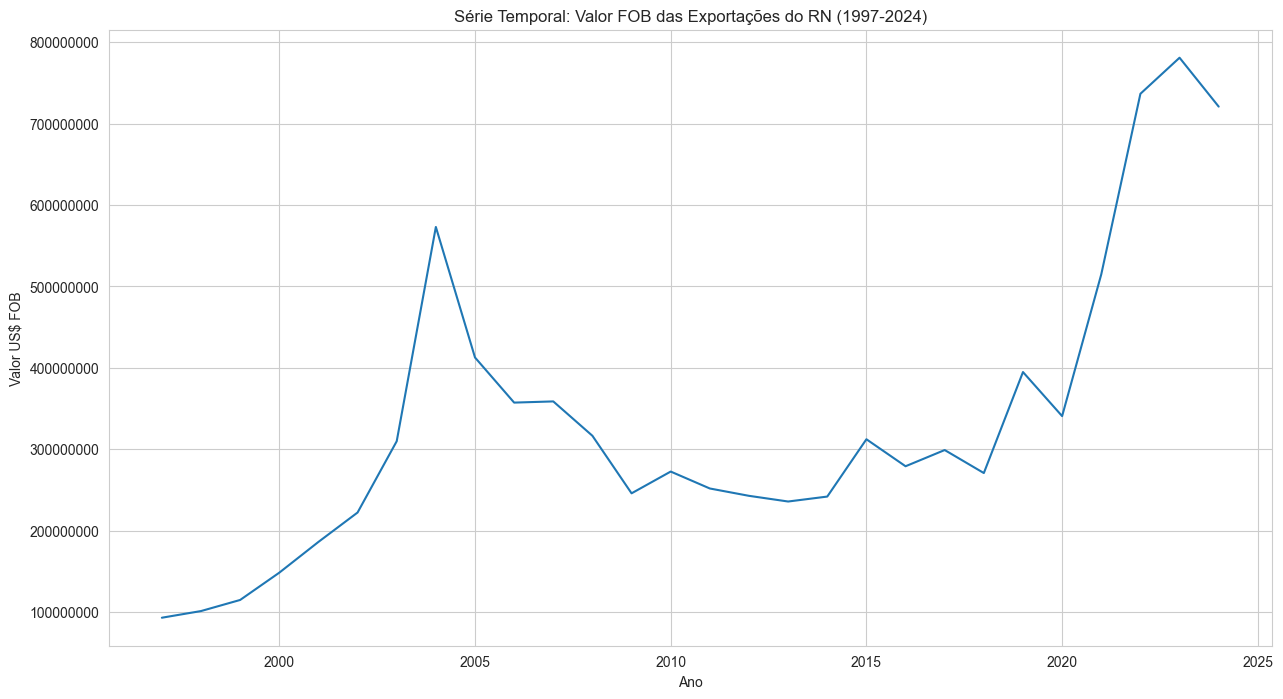

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Verificando se há dados faltantes no dataset 'Resultado'
missing_values = dataset_exportacoes_rn_continente.isnull().sum()

# Convertendo a coluna 'Data' para o tipo datetime (se ainda não estiver no formato de data)
dataset_exportacoes_rn_continente['Data'] = pd.to_datetime(dataset_exportacoes_rn_continente['Data'], errors='coerce')

# Agrupando os dados por ano e somando o valor FOB para cada ano
exportacoes_por_ano = dataset_exportacoes_rn_continente.groupby(dataset_exportacoes_rn_continente['Data'].dt.year)['Valor US$ FOB'].sum().reset_index()

# Plotando o gráfico de série temporal (exportações ao longo dos anos)
plt.figure(figsize=(15, 8))
sns.lineplot(data=exportacoes_por_ano, x='Data', y='Valor US$ FOB', marker="")

# Ajustando para exibir o valor do eixo y de forma completa, sem notação científica
plt.ticklabel_format(style='plain', axis='y')
plt.title('Série Temporal: Valor FOB das Exportações do RN (1997-2024)')
plt.xlabel('Ano')
plt.ylabel('Valor US$ FOB')
plt.grid(True)
plt.show()


In [22]:
# Filtrar os dados apenas para o mês de dezembro de 2011
df_dezembro_2011 = dataset_exportacoes_rn_continente[(dataset_exportacoes_rn_continente['Data'].dt.year == 2011) & (dataset_exportacoes_rn_continente['Data'].dt.month == 12)]
df_dezembro_2011 = df_dezembro_2011.sort_values(by='Valor FOB por Quilograma', ascending=False)
df_dezembro_2011

,Bloco Econômico,Países,Via,URF,Código SH6,Descrição SH6,Código SH4,Descrição SH4,Código SH2,Descrição SH2,Unidade estatística,Valor US$ FOB,Quilograma Líquido,Quantidade Estatística,Data,Valor FOB por Quilograma,Valor FOB por Quantidade Estatística
32291,América do Sul,Uruguai,MEIOS PROPRIOS,0915200 - CURITIBA,271600,Energia elétrica,2716,Energia elétrica,27,"Combustíveis minerais, óleos minerais e produt...",MIL QUILOWATT HORA,1432661,1,10348,2011-12-01,1.432661e+06,138.448106
32276,América do Sul,Argentina,RODOVIARIA,1010900 - URUGUAIANA,731930,"Outros alfinetes de uso manual, de ferro ou aço",7319,"Agulhas de costura, agulhas de tricô, agulhas-...",73,"Obras de ferro fundido, ferro ou aço",QUILOGRAMA LIQUIDO,3940,39,39,2011-12-01,1.010256e+02,101.025641
32277,América do Sul,Argentina,RODOVIARIA,1010900 - URUGUAIANA,741529,"Outros artefatos não roscados, de cobre",7415,"Pontas, pregos, percevejos, escápulas e artefa...",74,Cobre e suas obras,QUILOGRAMA LIQUIDO,390,5,5,2011-12-01,7.800000e+01,78.000000
32297,América do Sul,Uruguai,RODOVIARIA,1015500 - CHUI,731920,"Alfinetes de segurança, de ferro ou aço",7319,"Agulhas de costura, agulhas de tricô, agulhas-...",73,"Obras de ferro fundido, ferro ou aço",QUILOGRAMA LIQUIDO,62,1,1,2011-12-01,6.200000e+01,62.000000
32275,América do Sul,Argentina,RODOVIARIA,1010900 - URUGUAIANA,731920,"Alfinetes de segurança, de ferro ou aço",7319,"Agulhas de costura, agulhas de tricô, agulhas-...",73,"Obras de ferro fundido, ferro ou aço",QUILOGRAMA LIQUIDO,114,2,2,2011-12-01,5.700000e+01,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32384,Ásia (Exclusive Oriente Médio),Taiwan (Formosa),MARITIMA,0417800 - PORTO DE SUAPE,251612,"Granito, cortado em blocos ou placas de forma ...",2516,"Granito, pórfiro, basalto, arenito e outras pe...",25,"Sal; enxofre; terras e pedras; gesso, cal e ci...",METRO CUBICO,52356,161503,50,2011-12-01,3.241797e-01,1047.120000
32371,Ásia (Exclusive Oriente Médio),China,MARITIMA,0417800 - PORTO DE SUAPE,251612,"Granito, cortado em blocos ou placas de forma ...",2516,"Granito, pórfiro, basalto, arenito e outras pe...",25,"Sal; enxofre; terras e pedras; gesso, cal e ci...",METRO CUBICO,49675,201674,58,2011-12-01,2.463134e-01,856.465517
32270,América do Sul,Argentina,MARITIMA,0417800 - PORTO DE SUAPE,250700,"Caulim e outras argilas caulínicas, mesmo calc...",2507,"Caulim e outras argilas caulínicas, mesmo calc...",25,"Sal; enxofre; terras e pedras; gesso, cal e ci...",QUILOGRAMA LIQUIDO,23760,105600,105600,2011-12-01,2.250000e-01,0.225000
32385,Ásia (Exclusive Oriente Médio),Índia,MARITIMA,0417800 - PORTO DE SUAPE,251612,"Granito, cortado em blocos ou placas de forma ...",2516,"Granito, pórfiro, basalto, arenito e outras pe...",25,"Sal; enxofre; terras e pedras; gesso, cal e ci...",METRO CUBICO,332833,1486747,425,2011-12-01,2.238666e-01,783.136471


---

# Listagens

---

## Listagem de produtos mais relevantes por Valor US$ FOB

In [23]:
# Agrupar por 'Código SH6' e 'Descrição SH6' e somar o 'Valor US$ FOB'
produtos_relevantes_fob = dataset_exportacoes_rn_continente.groupby(['Código SH6', 'Descrição SH6'], as_index=False)['Valor US$ FOB'].sum()

# Ordenar pelos valores FOB em ordem decrescente e selecionar os 25 produtos com maior valor FOB
produtos_relevantes_fob = produtos_relevantes_fob.sort_values(by='Valor US$ FOB', ascending=False).head(25)

# Exibir o DataFrame
produtos_relevantes_fob

,Código SH6,Descrição SH6,Valor US$ FOB
882,80719,Melões frescos,1713981343
130,271019,Outros óleos de petróleo ou de minerais betumi...,1480080255
866,80132,"Castanha de caju, fresca ou seca, sem casca",687042640
128,270900,Óleos brutos de petróleo ou de minerais betumi...,544452806
213,30613,Camarões congelados,432772608
95,250100,Sal (incluídos o sal de mesa e o sal desnatura...,393741638
881,80711,Melancias frescas,361766730
29,170199,"Outros açúcares de cana, de beterraba e sacaro...",283332909
32,170490,"Outros produtos de confeitaria, sem cacau",262692516
869,80300,Bananas frescas ou secas,193938921


### Outros produtos de origem animal, impróprios para alimentação humana; animais mortos   
> Fígados, biles, rins e etc

> Pode ser usado para adubo, ração animal, industria farmaceutica e química

## Listagem de produtos mais relevantes por Quilograma Líquido

In [24]:
# Agrupar por 'Código SH6' e 'Descrição SH6' e somar o 'Quilograma Líquido'
produtos_relevantes_quilograma = dataset_exportacoes_rn_continente.groupby(['Código SH6', 'Descrição SH6'], as_index=False)['Quilograma Líquido'].sum()

# Ordenar pelos valores de Quilograma Líquido em ordem decrescente e selecionar os 25 produtos com maior valor
produtos_relevantes_quilograma = produtos_relevantes_quilograma.sort_values(by='Quilograma Líquido', ascending=False).head(25)

# Exibir o DataFrame
produtos_relevantes_quilograma

,Código SH6,Descrição SH6,Quilograma Líquido
95,250100,Sal (incluídos o sal de mesa e o sal desnatura...,21066703626
882,80719,Melões frescos,2852586373
130,271019,Outros óleos de petróleo ou de minerais betumi...,2652142092
128,270900,Óleos brutos de petróleo ou de minerais betumi...,2072703393
29,170199,"Outros açúcares de cana, de beterraba e sacaro...",908921816
881,80711,Melancias frescas,756477753
869,80300,Bananas frescas ou secas,616910273
108,251612,"Granito, cortado em blocos ou placas de forma ...",356269537
117,260111,Minérios de ferro não aglomerados e seus conce...,285161435
875,80450,"Goiabas, mangas e mangostões, frescos ou secos",189237649


## Tabela de valores por transações de um determinado código SH6



In [25]:
import pandas as pd

# Agrupar por "Código SH6", contar as transações, somar o valor "US$ FOB" e adicionar a descrição
dataset_valores_por_transacao = dataset_exportacoes_rn_continente.groupby('Código SH6').agg(
    Descricao_SH6=('Descrição SH6', 'first'),          # Pega a primeira ocorrência da descrição
    Quantidade_Transacoes=('Código SH6', 'size'),      # Conta a quantidade de transações
    Soma_Valor_FOB=('Valor US$ FOB', 'sum'),           # Calcula a soma do valor US$ FOB
).reset_index()


dataset_valores_por_transacao["valor_medio_transacao"] = dataset_valores_por_transacao["Soma_Valor_FOB"] / dataset_valores_por_transacao["Quantidade_Transacoes"]

# Ordenar pelo valor "Soma_Valor_FOB" em ordem decrescente e exibir o resultado
dataset_valores_por_transacao = dataset_valores_por_transacao.sort_values(by="valor_medio_transacao", ascending=False)
dataset_valores_por_transacao

,Código SH6,Descricao_SH6,Quantidade_Transacoes,Soma_Valor_FOB,valor_medio_transacao
1206,880240,"Aviões e outros veículos aéreos, de peso > 15....",1,25582822,2.558282e+07
128,270900,Óleos brutos de petróleo ou de minerais betumi...,24,544452806,2.268553e+07
937,841112,"Turborreatores, de empuxo > 25 kN",1,21726000,2.172600e+07
132,271600,Energia elétrica,3,19249408,6.416469e+06
129,271012,Óleos leves e preparações,6,33054137,5.509023e+06
...,...,...,...,...,...
887,81110,"Morangos congelados, não cozidos ou cozidos em...",1,2,2.000000e+00
137,283650,Carbonato de cálcio,1,2,2.000000e+00
358,420291,Outros artefatos com a superfície exterior de ...,1,2,2.000000e+00
150,293950,Teofilina e aminofilina e seus derivados; seus...,1,0,0.000000e+00


## Listagem de produto por valor médio da transação

In [26]:
# Filtrar os produtos com menos de 10 transações
dataset_produtos_valor_medio = dataset_valores_por_transacao[dataset_valores_por_transacao["Quantidade_Transacoes"] > 10]
dataset_produtos_valor_medio = dataset_produtos_valor_medio.sort_values(by="valor_medio_transacao", ascending=False)
dataset_produtos_valor_medio = dataset_produtos_valor_medio.round(2)

# Exibir o resultado
dataset_produtos_valor_medio = pd.DataFrame(dataset_produtos_valor_medio.head(25))
dataset_produtos_valor_medio

,Código SH6,Descricao_SH6,Quantidade_Transacoes,Soma_Valor_FOB,valor_medio_transacao
128,270900,Óleos brutos de petróleo ou de minerais betumi...,24,544452806,22685533.58
130,271019,Outros óleos de petróleo ou de minerais betumi...,274,1480080255,5401752.76
29,170199,"Outros açúcares de cana, de beterraba e sacaro...",126,283332909,2248673.88
87,220710,Álcool etílico não desnaturado com volume de t...,37,72175076,1950677.73
28,170114,Outros açúcares de cana,39,36569664,937683.69
27,170111,"Açúcar de cana, em bruto, sem adição de aromat...",30,28053296,935109.87
667,630130,"Cobertores e mantas, de algodão, não elétricos",75,47918874,638918.32
882,80719,Melões frescos,3334,1713981343,514091.58
213,30613,Camarões congelados,1218,432772608,355314.13
427,520522,"Fios de algodão simples, de fibras penteadas, ...",24,8295510,345646.25


## Listagem dos produtos por quantidade de transações

In [27]:
# Exibir o resultado
dataset_produtos_quantidade_transacoes = dataset_produtos_valor_medio.sort_values(by="Quantidade_Transacoes", ascending=False)
dataset_produtos_quantidade_transacoes = dataset_produtos_quantidade_transacoes.head(25)
dataset_produtos_quantidade_transacoes

,Código SH6,Descricao_SH6,Quantidade_Transacoes,Soma_Valor_FOB,valor_medio_transacao
882,80719,Melões frescos,3334,1713981343,514091.58
866,80132,"Castanha de caju, fresca ou seca, sem casca",2399,687042640,286387.09
95,250100,Sal (incluídos o sal de mesa e o sal desnatura...,1342,393741638,293399.13
213,30613,Camarões congelados,1218,432772608,355314.13
420,51199,"Outros produtos de origem animal, impróprios p...",606,162536473,268212.00
212,30611,Lagostas congeladas,596,171063315,287018.98
597,610910,"Camisetas (T-shirts) e camisetas interiores, d...",471,120883565,256653.00
130,271019,Outros óleos de petróleo ou de minerais betumi...,274,1480080255,5401752.76
122,261100,Minérios de tungstênio e seus concentrados,225,59603724,264905.44
669,630221,"Outras roupas de cama, de algodão, estampadas",133,36925129,277632.55


---

# Listagens apenas com código e descrição para comparação

---

## Lista por Valor US$ FOB apenas com código e descrição SH6

In [28]:
produtos_relevantes_fob_sh6 = produtos_relevantes_fob.drop('Valor US$ FOB', axis = 1)

# Resetando os índices para que comecem a partir de 1
produtos_relevantes_fob_sh6.reset_index(drop=True, inplace=True)
# Definindo novos índices a partir de 1
produtos_relevantes_fob_sh6.index = range(1, len(produtos_relevantes_fob_sh6) + 1)

produtos_relevantes_fob_sh6

,Código SH6,Descrição SH6
1,80719,Melões frescos
2,271019,Outros óleos de petróleo ou de minerais betumi...
3,80132,"Castanha de caju, fresca ou seca, sem casca"
4,270900,Óleos brutos de petróleo ou de minerais betumi...
5,30613,Camarões congelados
6,250100,Sal (incluídos o sal de mesa e o sal desnatura...
7,80711,Melancias frescas
8,170199,"Outros açúcares de cana, de beterraba e sacaro..."
9,170490,"Outros produtos de confeitaria, sem cacau"
10,80300,Bananas frescas ou secas


## Lista por Quilograma Líquido apenas com código e descrição SH6

In [29]:
produtos_relevantes_quilograma_sh6 = produtos_relevantes_quilograma

# Removendo as colunas desnecessárias e renomeando
produtos_relevantes_quilograma_sh6 = produtos_relevantes_quilograma_sh6.drop(
    ["Quilograma Líquido"], axis=1
).rename(columns={"Descricao_SH6": "Descrição SH6"})

# Resetando os índices para que comecem a partir de 1
produtos_relevantes_quilograma_sh6.reset_index(drop=True, inplace=True)

# Definindo novos índices a partir de 1
produtos_relevantes_quilograma_sh6.index = range(1, len(produtos_relevantes_quilograma_sh6) + 1)


# Exibindo o DataFrame atualizado
produtos_relevantes_quilograma_sh6

,Código SH6,Descrição SH6
1,250100,Sal (incluídos o sal de mesa e o sal desnatura...
2,80719,Melões frescos
3,271019,Outros óleos de petróleo ou de minerais betumi...
4,270900,Óleos brutos de petróleo ou de minerais betumi...
5,170199,"Outros açúcares de cana, de beterraba e sacaro..."
6,80711,Melancias frescas
7,80300,Bananas frescas ou secas
8,251612,"Granito, cortado em blocos ou placas de forma ..."
9,260111,Minérios de ferro não aglomerados e seus conce...
10,80450,"Goiabas, mangas e mangostões, frescos ou secos"


## Lista por valor médio da transação apenas com código e descrição SH6

In [37]:
# Removendo as colunas desnecessárias e renomeando
dataset_produtos_valor_medio_sh6 = dataset_produtos_valor_medio.drop(
    ["Quantidade_Transacoes", "Soma_Valor_FOB", "valor_medio_transacao"], axis=1
).rename(columns={"Descricao_SH6": "Descrição SH6"})

# Resetando os índices para que comecem a partir de 1
dataset_produtos_valor_medio.reset_index(drop=True, inplace=True)
dataset_produtos_valor_medio.index = dataset_produtos_valor_medio.index + 1

# Exibindo o DataFrame atualizado
dataset_produtos_valor_medio_sh6

,Código SH6,Descrição SH6
1,270900,Óleos brutos de petróleo ou de minerais betumi...
2,271019,Outros óleos de petróleo ou de minerais betumi...
3,170199,"Outros açúcares de cana, de beterraba e sacaro..."
4,220710,Álcool etílico não desnaturado com volume de t...
5,170114,Outros açúcares de cana
6,170111,"Açúcar de cana, em bruto, sem adição de aromat..."
7,630130,"Cobertores e mantas, de algodão, não elétricos"
8,80719,Melões frescos
9,30613,Camarões congelados
10,520522,"Fios de algodão simples, de fibras penteadas, ..."


## Lista por quantidade total de transações apenas com código e descrição SH6

In [31]:
# Removendo as colunas desnecessárias e renomeando
dataset_produtos_quantidade_transacoes_sh6 = dataset_produtos_quantidade_transacoes.drop(
    ["Quantidade_Transacoes", "Soma_Valor_FOB", "valor_medio_transacao"], axis=1
).rename(columns={"Descricao_SH6": "Descrição SH6"})

# Resetando os índices para que comecem a partir de 1
dataset_produtos_quantidade_transacoes_sh6.reset_index(drop=True, inplace=True)
dataset_produtos_quantidade_transacoes_sh6.index = dataset_produtos_quantidade_transacoes_sh6.index + 1

# Exibindo o DataFrame atualizado
dataset_produtos_quantidade_transacoes_sh6

,Código SH6,Descrição SH6
1,80719,Melões frescos
2,80132,"Castanha de caju, fresca ou seca, sem casca"
3,250100,Sal (incluídos o sal de mesa e o sal desnatura...
4,30613,Camarões congelados
5,51199,"Outros produtos de origem animal, impróprios p..."
6,30611,Lagostas congeladas
7,610910,"Camisetas (T-shirts) e camisetas interiores, d..."
8,271019,Outros óleos de petróleo ou de minerais betumi...
9,261100,Minérios de tungstênio e seus concentrados
10,630221,"Outras roupas de cama, de algodão, estampadas"


---

# Cálculo da relevância histórica dos produtos 

---

# Cálculo de relevância dos produtos ao longo dos anos

## Construindo dataframe com indice de cada lista

In [40]:
import pandas as pd

# Definindo a lista de DataFrames fornecidos
dataframes = [
    produtos_relevantes_fob_sh6,
    produtos_relevantes_quilograma_sh6,
    dataset_produtos_valor_medio_sh6,
    dataset_produtos_quantidade_transacoes_sh6
]

# Supondo que você tenha os dataframes df1, df2, df3, df4 com as colunas "Código SH6" e "Descrição SH6"
# Crie o dataframe final com as colunas que você especificou
df_indices = pd.DataFrame({
    "Código SH6": [],
    "Descrição SH6": [],
    "Peso na lista 1": [],
    "Peso na lista 2": [],
    "Peso na lista 3": [],
    "Peso na lista 4": [],
})

def peso_produto_lista(indice_produto):
    return 26 - indice_produto

# Processar cada dataframe e obter a posição dos códigos
for i, df in enumerate(dataframes):
    for idx, row in df.iterrows():
        codigo = row['Código SH6']
        descricao = row['Descrição SH6']

        # Procurar se o código já existe no dataframe df_indices
        if codigo not in df_indices['Código SH6'].values:
            # Se não existir, adicionar uma nova linha
            new_row = {
                "Código SH6": codigo,
                "Descrição SH6": descricao,
                "Peso na lista 1": 0,
                "Peso na lista 2": 0,
                "Peso na lista 3": 0,
                "Peso na lista 4": 0,
            }
            df_indices = pd.concat([df_indices, pd.DataFrame([new_row])], ignore_index=True)

        # Atualizar a posição para o código encontrado
        pos_col = f"Peso na lista {i + 1}"
        df_indices.loc[df_indices['Código SH6'] == codigo, pos_col] = peso_produto_lista(idx)
        df_indices = pd.DataFrame(df_indices)
df_indices

,Código SH6,Descrição SH6,Peso na lista 1,Peso na lista 2,Peso na lista 3,Peso na lista 4
0,80719,Melões frescos,25.0,24.0,18.0,25.0
1,271019,Outros óleos de petróleo ou de minerais betumi...,24.0,23.0,24.0,18.0
2,80132,"Castanha de caju, fresca ou seca, sem casca",23.0,12.0,9.0,24.0
3,270900,Óleos brutos de petróleo ou de minerais betumi...,22.0,22.0,25.0,1.0
4,30613,Camarões congelados,21.0,9.0,17.0,22.0
5,250100,Sal (incluídos o sal de mesa e o sal desnatura...,20.0,25.0,12.0,23.0
6,80711,Melancias frescas,19.0,20.0,0.0,0.0
7,170199,"Outros açúcares de cana, de beterraba e sacaro...",18.0,21.0,23.0,15.0
8,170490,"Outros produtos de confeitaria, sem cacau",17.0,14.0,0.0,0.0
9,80300,Bananas frescas ou secas,16.0,19.0,0.0,0.0


# Adicionando coluna de relevancia para cada produto

In [41]:
# Pesos das listas
peso_lista_1 = 1
peso_lista_2 = 1
peso_lista_3 = 1
peso_lista_4 = 1
lista_pesos = [peso_lista_1, peso_lista_2, peso_lista_3, peso_lista_4]


def calculo_metrica_relevancia(lista_posicoes):
    df_relevancias = pd.DataFrame({
        "Código SH6": [],
        "Descrição SH6": [],
        "Peso na lista 1": [],
        "Peso na lista 2": [],
        "Peso na lista 3": [],
        "Peso na lista 4": [],
        "Relevância": [],
    })

    for i, produto in lista_posicoes.iterrows():
        relevancia_produto = 0
        for indice, peso in enumerate(lista_pesos):
            peso_produto_lista = produto[f"Peso na lista {indice+1}"]
            relevancia_produto += peso_produto_lista * peso

        # Adicionando os dados do produto ao DataFrame
        nova_linha = pd.DataFrame({
            "Código SH6": [produto["Código SH6"]],
            "Descrição SH6": [produto["Descrição SH6"]],
            "Peso na lista 1": [produto["Peso na lista 1"]],
            "Peso na lista 2": [produto["Peso na lista 2"]],
            "Peso na lista 3": [produto["Peso na lista 3"]],
            "Peso na lista 4": [produto["Peso na lista 4"]],
            "Relevância": [relevancia_produto]
        })
         # Usando pd.concat para adicionar a nova linha
        df_relevancias = pd.concat([df_relevancias, nova_linha], ignore_index=True)

    return df_relevancias

In [42]:
df_relevancias = calculo_metrica_relevancia(df_indices)
df_relevancias

,Código SH6,Descrição SH6,Peso na lista 1,Peso na lista 2,Peso na lista 3,Peso na lista 4,Relevância
0,80719,Melões frescos,25.0,24.0,18.0,25.0,92.0
1,271019,Outros óleos de petróleo ou de minerais betumi...,24.0,23.0,24.0,18.0,89.0
2,80132,"Castanha de caju, fresca ou seca, sem casca",23.0,12.0,9.0,24.0,68.0
3,270900,Óleos brutos de petróleo ou de minerais betumi...,22.0,22.0,25.0,1.0,70.0
4,30613,Camarões congelados,21.0,9.0,17.0,22.0,69.0
5,250100,Sal (incluídos o sal de mesa e o sal desnatura...,20.0,25.0,12.0,23.0,80.0
6,80711,Melancias frescas,19.0,20.0,0.0,0.0,39.0
7,170199,"Outros açúcares de cana, de beterraba e sacaro...",18.0,21.0,23.0,15.0,77.0
8,170490,"Outros produtos de confeitaria, sem cacau",17.0,14.0,0.0,0.0,31.0
9,80300,Bananas frescas ou secas,16.0,19.0,0.0,0.0,35.0


# Recorte do dataset completo

> Deixando apenas os 25 produtos a serem analisados

In [43]:
df_relevancias_25 = df_relevancias.head(25)
df_relevancias_25 = df_relevancias_25.sort_values(by="Relevância", ascending=False)


In [44]:
df_exportacoes_produtos_relevantes_continente = pd.DataFrame()
df_exportacoes_produtos_relevantes_blocos_economicos = pd.DataFrame()

for _, produto in df_relevancias_25.iterrows():
    codigo_sh6 = produto[0]

    # Filtra as linhas onde o código SH6 é igual ao código atual
    filtro_continentes = dataset_exportacoes_rn_continente[dataset_exportacoes_rn_continente['Código SH6'] == codigo_sh6]
    filtro_blocos_economicos = dataset_exportacoes_rn_blocos_economicos[dataset_exportacoes_rn_blocos_economicos['Código SH6'] == codigo_sh6]

    # Concatena ao DataFrame final
    df_exportacoes_produtos_relevantes_continente = pd.concat([df_exportacoes_produtos_relevantes_continente, filtro_continentes])
    df_exportacoes_produtos_relevantes_blocos_economicos = pd.concat([df_exportacoes_produtos_relevantes_blocos_economicos, filtro_blocos_economicos])

salvar_planilhas_recortadas = input("Baixar datasets com apenas os 25 produtos mais relevantes? (1) Sim | (2) Não")

if salvar_planilhas_recortadas == 1:
    df_exportacoes_produtos_relevantes_continente.to_csv("dataset_produtos_relevantes_exportacoes_RN_continente.csv")
    df_exportacoes_produtos_relevantes_blocos_economicos.to_csv("dataset_produtos_relevantes_exportacoes_RN_blocos_economicos.csv")
    print("Datasets salvos com sucesso!!!")


C:\Users\joao1\AppData\Local\Temp\ipykernel_12764\2343990807.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  codigo_sh6 = produto[0]
